<a href="https://colab.research.google.com/github/ayomibamm/Cardiotocography/blob/main/Machine_Learning_Project_Cardiotocography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARDIOTOCOGRAPHY FOR PERINATAL OUTCOME PREDICTION**

## **IMPORT REQUIRED DEPENDENCIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split 
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

## **DATA COLLECTION & ANALYSIS**

Dataset source: https://archive.ics.uci.edu/ml/datasets/cardiotocography

In [ ]:
# load dataset
health_data = pd.read_csv("cardiotocography_data.csv")

In [ ]:
# The first 10 rows of the data
health_data.head(10)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,01/12/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,03/05/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,03/05/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,03/05/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,03/05/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,Fmcs_2.txt,03/05/1996,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Fmcs_2.txt,03/05/1996,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,Hasc_1.txt,22/02/1995,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,22/02/1995,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [ ]:
# the last 10 rows in the dataset
health_data.tail(10)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2120,S8001045.dsp,06/06/1998,CTG2122.txt,790.0,1677.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2121,S8001045.dsp,06/06/1998,CTG2123.txt,1143.0,1947.0,140.0,140.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2122,S8001045.dsp,06/06/1998,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,S8001045.dsp,06/06/1998,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,S8001045.dsp,06/06/1998,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,06/06/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,06/06/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# the number of rows and columns 
health_data.shape

(2130, 40)

## **CLEANING AND PREPARING DATA**

Target Variables

*   1: 'normal'
*   2: 'suspect'
*   3: 'pathologic'

In [ ]:
# remove unrelated NaN rows due to error made by excel
health_data.drop(index=[0,2127,2128,2129], inplace = True)

Remove from raw data: 
- FileName, Date, SegTile 
- LBE as the same as LB 
- b and e is the start and end of the instant, respectively. 
- Column name A to FS are for the CLASS code 1 - 10.


In [ ]:
# remove unnecessary columns as suggested by originator.
health_data.drop(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'DR', 'A', 
                  'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'], axis=1, inplace=True)

In [ ]:
health_data.shape

(2126, 23)

In [ ]:
# statistical summary of dataset
health_data.describe().T

# the max and mean HR are within normal range of 110 to 160

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


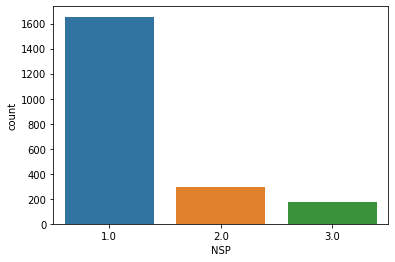

Percentage ratio = 78 : 14: 8


In [ ]:
#checking if dataset imbalance
sns.countplot(x ='NSP', data = health_data)
plt.show()

total = len(health_data)
normal = (len(health_data[health_data['NSP'] == 1]))/total * 100
suspect = (len(health_data[health_data['NSP'] == 2]))/total * 100
pathologic = (len(health_data[health_data['NSP'] == 3]))/total * 100
print(f'Percentage ratio = {round(normal)} : {round(suspect)}: {round(pathologic)}')
 
# Therefore dataset is imbalanced, with percentage ratio of 78:14:8. There are 
#- more 'normal data' than the rest class.

In [ ]:
# checking data type of the columns
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [ ]:
# analysing number of duplicated rows 
duplicate = health_data.duplicated()
print(duplicate.sum()) 

12


In [ ]:
# remove duplicates
health_data.drop_duplicates(inplace = True)

In [ ]:
health_data.shape

(2114, 23)

### **PRE-PROCESSING TECHNIQUE**

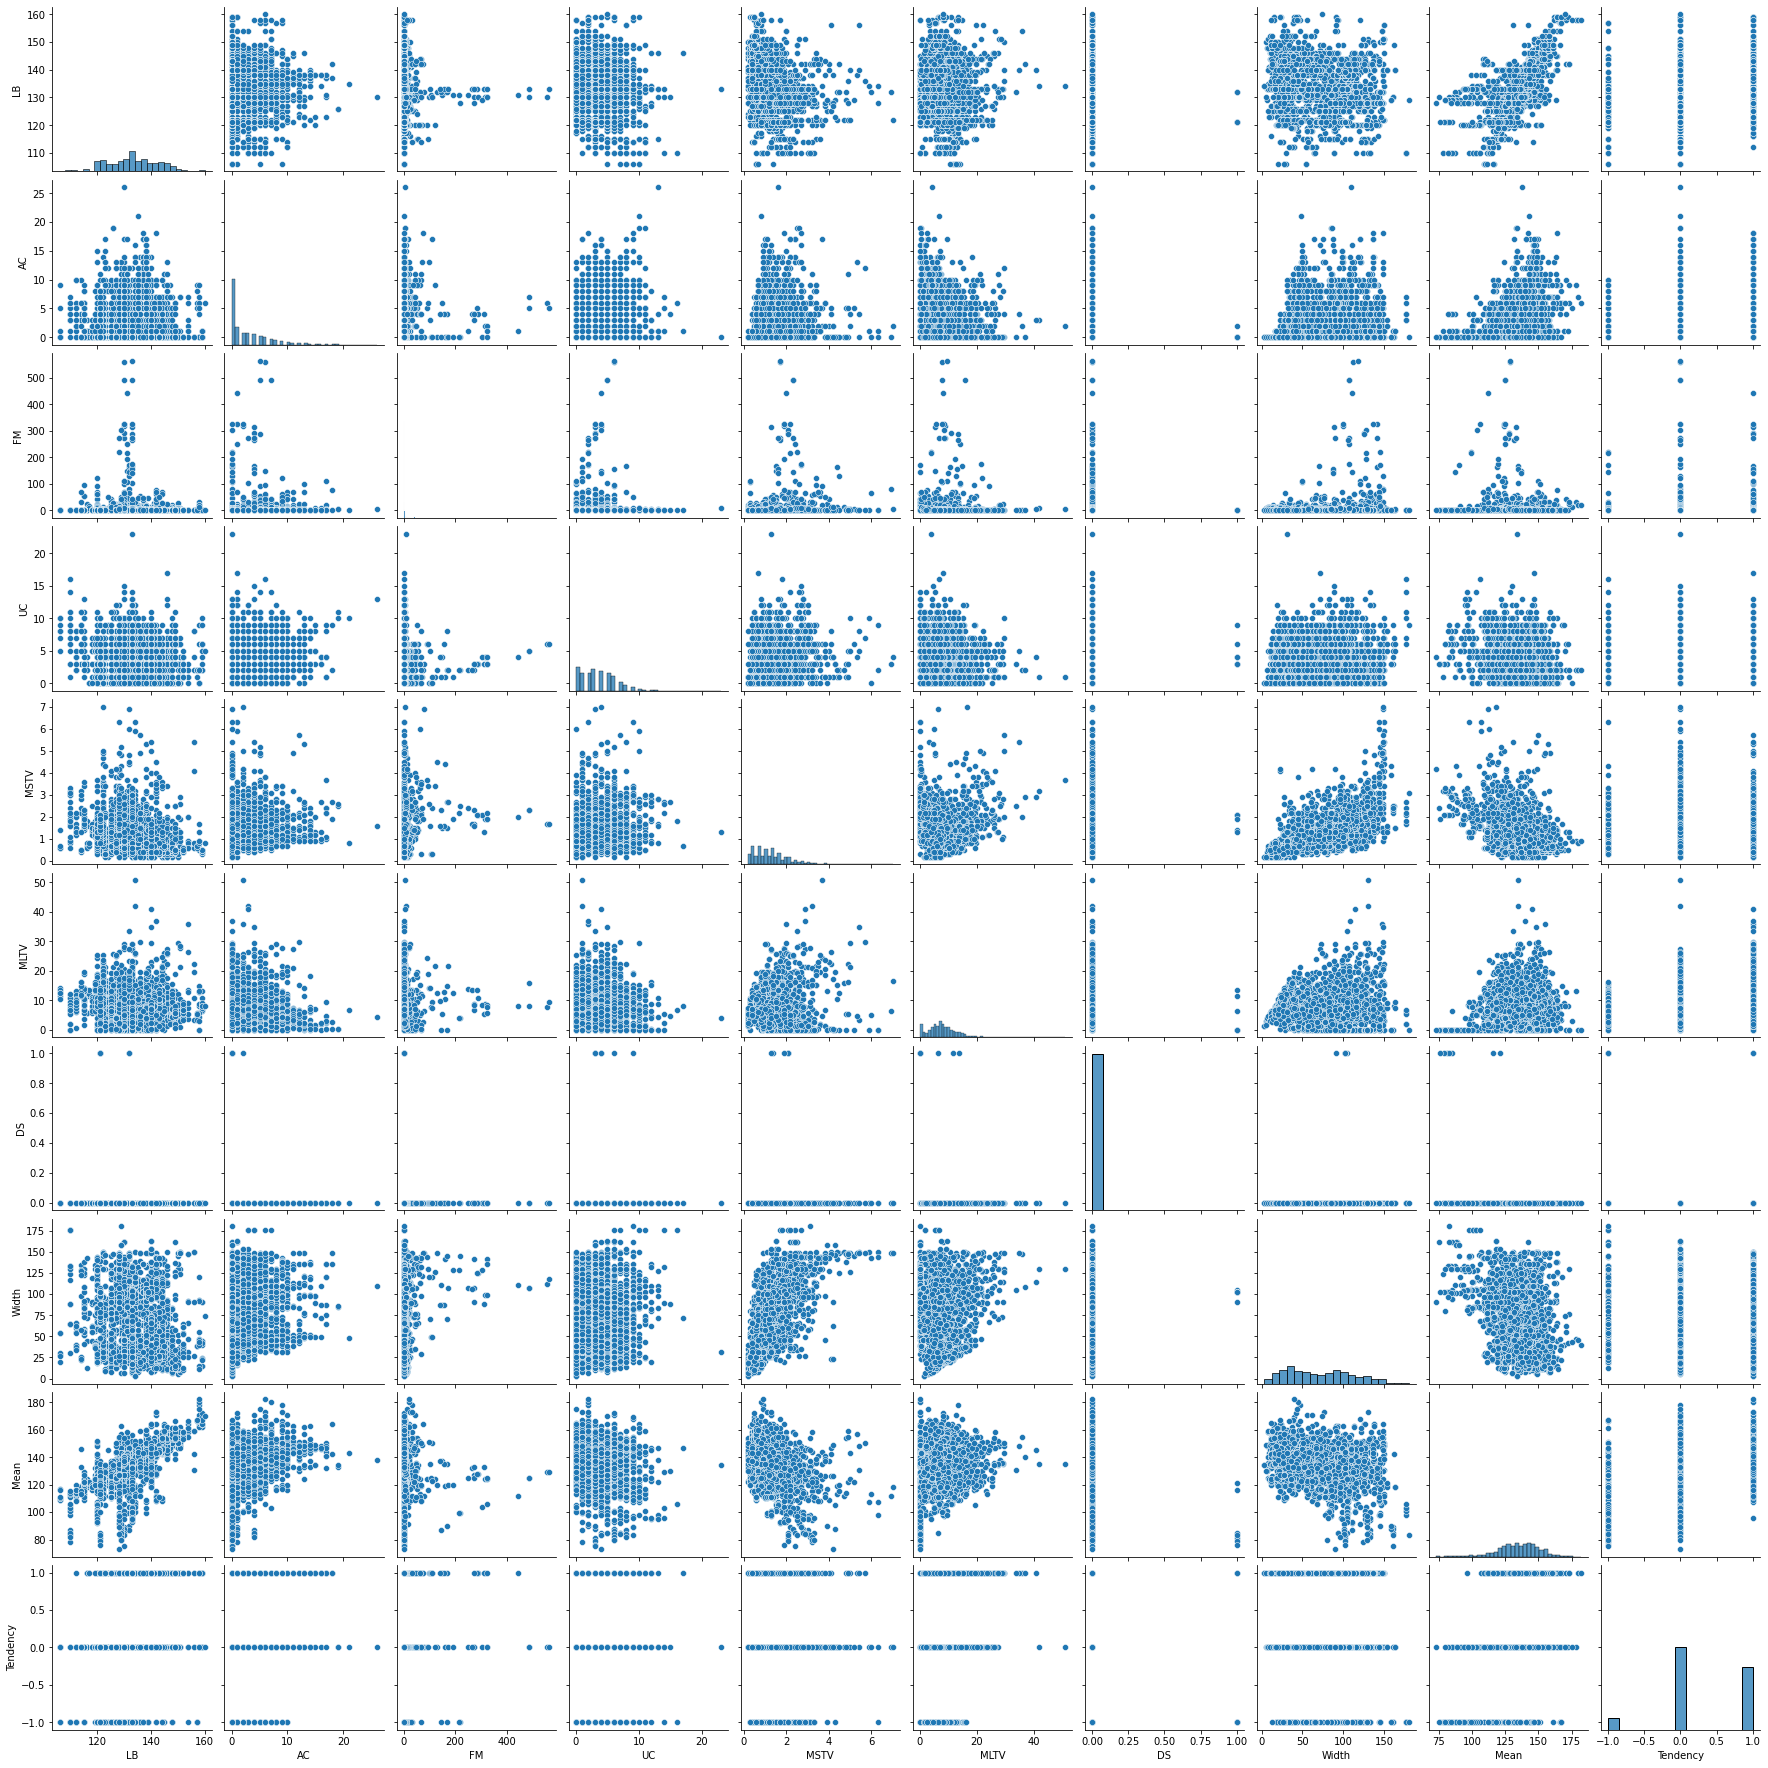

In [ ]:
# scatterplot matrix with specific columns to visualize outliers and distribution
cols = ['LB', 'AC', 'FM', 'UC', 'MSTV', 'MLTV', 'DS', 'Width', 'Mean', 'Tendency']
sns.pairplot(data=health_data[cols], palette = 'flare')

In [ ]:
# correlation analysis 
correlation = health_data.corr(method = 'pearson')
correlation

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
LB,1.000000,-0.077720,-0.033759,-0.128801,0.302956,-0.277941,0.282097,-0.028722,-0.156018,-0.053659,...,0.274516,-0.111879,-0.004292,0.708220,0.722212,0.788596,-0.133804,0.295373,0.138703,0.144303
AC,-0.077720,1.000000,0.053864,0.209835,-0.197369,0.190179,-0.344484,-0.128581,-0.013107,-0.039548,...,0.372384,0.189920,-0.012713,0.222126,0.237749,0.251476,0.110556,0.033972,-0.254271,-0.339721
FM,-0.033759,0.053864,1.000000,-0.037196,-0.117508,0.138359,-0.073307,0.021567,0.076039,-0.010360,...,0.111285,0.184039,-0.014887,-0.037666,-0.085931,-0.056507,0.177692,-0.000021,0.077669,0.060462
UC,-0.128801,0.209835,-0.037196,1.000000,-0.078462,0.230810,-0.245155,-0.104077,0.337373,0.018130,...,0.142665,0.093405,0.020051,-0.078580,-0.170374,-0.111978,0.181656,-0.058601,-0.072929,-0.161801
ASTV,0.302956,-0.197369,-0.117508,-0.078462,1.000000,-0.428392,0.455376,-0.314227,-0.036223,0.034181,...,-0.111803,-0.168137,-0.149264,0.055794,0.071855,0.117460,-0.146004,-0.009553,0.280264,0.468566
MSTV,-0.277941,0.190179,0.138359,0.230810,-0.428392,1.000000,-0.468749,0.073672,0.516528,0.034017,...,0.409427,0.502111,0.265424,-0.306636,-0.444620,-0.335091,0.555566,-0.063407,0.081490,-0.099607
ALTV,0.282097,-0.344484,-0.073307,-0.245155,0.455376,-0.468749,1.000000,-0.169708,-0.266131,-0.030793,...,-0.284856,-0.278673,-0.120777,0.163268,0.220363,0.184254,-0.281361,0.038863,0.295797,0.418792
MLTV,-0.028722,-0.128581,0.021567,-0.104077,-0.314227,0.073672,-0.169708,1.000000,-0.250657,-0.037600,...,0.005160,0.056582,0.125356,0.074493,0.140269,0.065816,-0.163326,0.152751,-0.226388,-0.225155
DL,-0.156018,-0.013107,0.076039,0.337373,-0.036223,0.516528,-0.266131,-0.250657,1.000000,0.121549,...,0.240801,0.393305,0.207208,-0.315966,-0.510149,-0.354479,0.514166,0.000853,0.398980,0.067354
DS,-0.053659,-0.039548,-0.010360,0.018130,0.034181,0.034017,-0.030793,-0.037600,0.121549,1.000000,...,-0.021404,0.006867,0.043318,-0.215485,-0.158903,-0.160738,0.136362,-0.070510,0.061214,0.132735


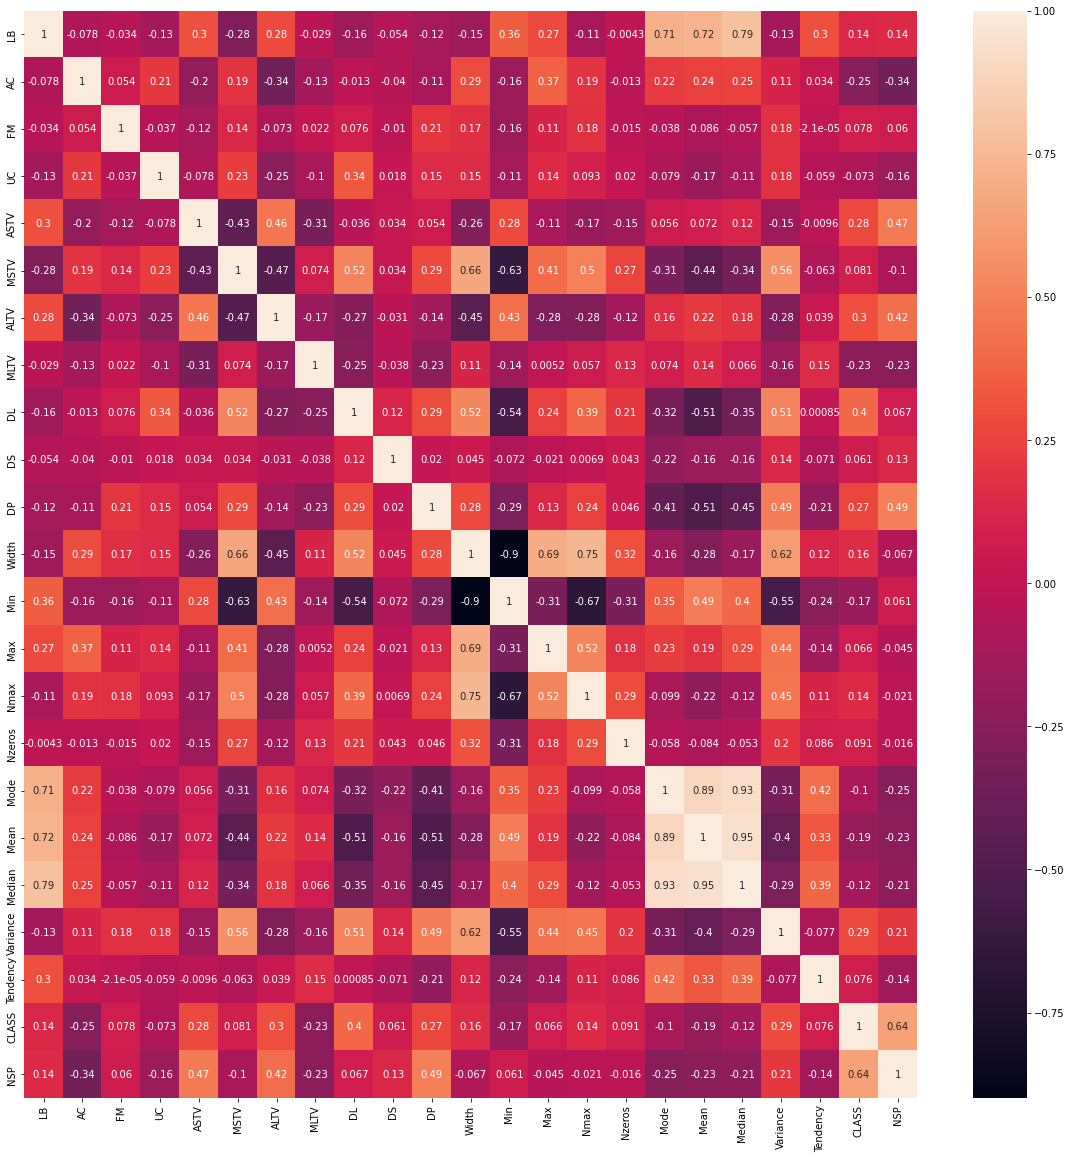

In [ ]:
# correlation heatmap shows high correction between mean median and mode- multicollinearity problem
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True)

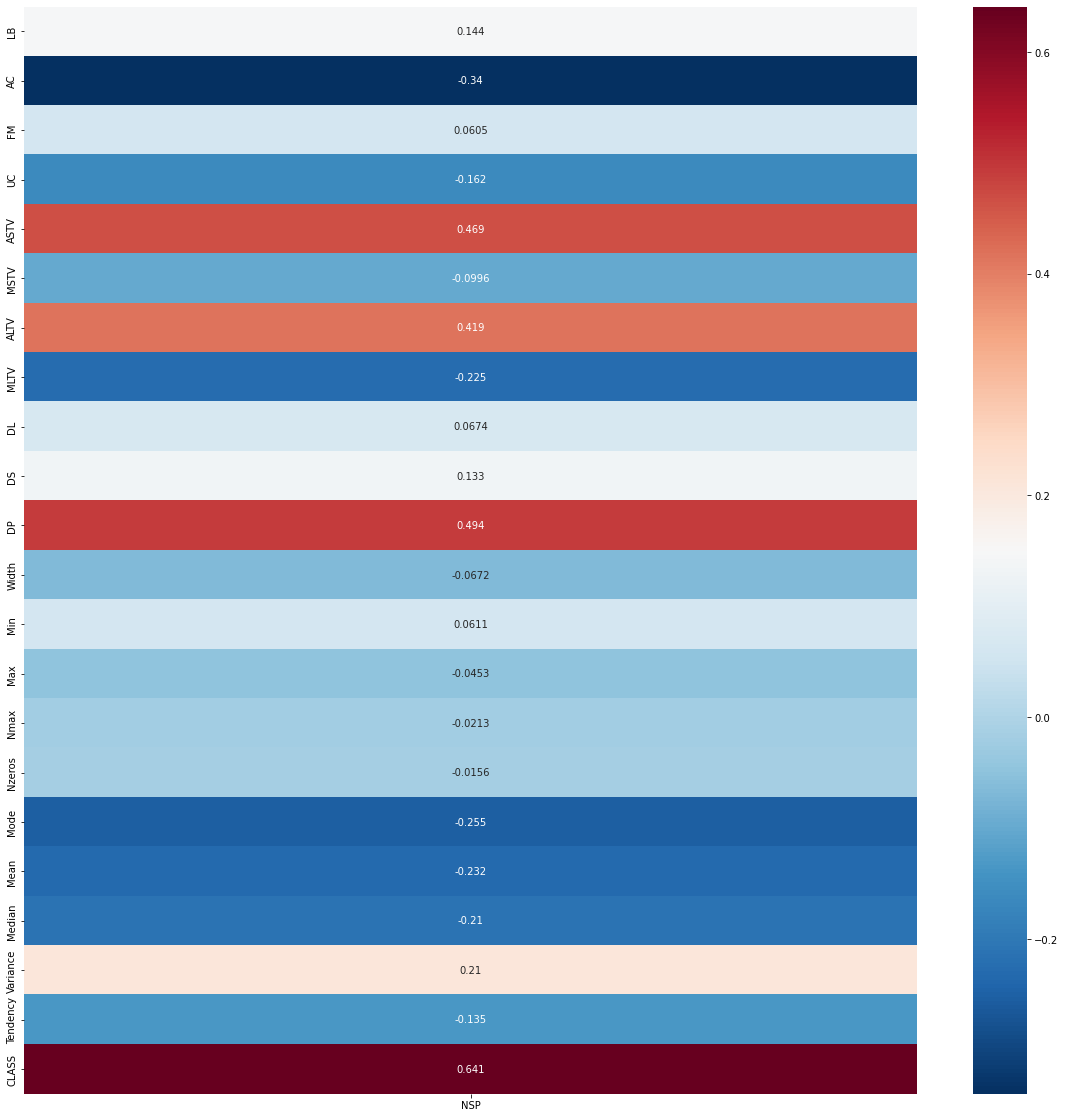

In [ ]:
# Isolate the column corresponding to the target `NSP`
corr_target = correlation[['NSP']].drop(labels=['NSP'])
 
plt.figure(figsize=(20,20))
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [ ]:
# remove weakly correlated varibales by setting threshold to  0.3
corr_target[abs(corr_target)>0.3].dropna()

,NSP
AC,-0.339721
ASTV,0.468566
ALTV,0.418792
DP,0.493853
CLASS,0.640986


In [ ]:
# divide to dependent and independent 
target_name = 'NSP'
y = health_data[target_name]
x = health_data.drop(target_name, axis=1)

In [ ]:
x.head(10)

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0
6,134.0,1.0,0.0,10.0,26.0,5.9,0.0,0.0,9.0,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,8.0
7,134.0,1.0,0.0,9.0,29.0,6.3,0.0,0.0,6.0,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,8.0
8,122.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,0.0,0.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,9.0
9,122.0,0.0,0.0,1.0,84.0,0.5,5.0,13.6,0.0,0.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,9.0
10,122.0,0.0,0.0,3.0,86.0,0.3,6.0,10.6,0.0,0.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,9.0


In [ ]:
y.head(10)

1     2.0
2     1.0
3     1.0
4     1.0
5     1.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
Name: NSP, dtype: float64

In [ ]:
health_data.shape

(2114, 23)

In [ ]:
# Scaling of numerical varible. Robustscaler as it's robust to outliers
#- doesn't require need to drop outliers. As data is skewed to the 'normal' data,
#-- it is not advisable to remove outliers. Aldso, data is precious.

scaler = preprocessing.RobustScaler()
scaled_x = scaler.fit_transform(x)

In [ ]:
# calculate VIF to analyze multicollinearity
vif_data = pd.DataFrame()
vif_data['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif_data["features"] = x.columns

print(vif_data)
 # as shown, some of the vif are >10. We don't want to keep removing features 
# this vif information does not tell us anything about our target column 

            vif  features
0      5.841976        LB
1      2.279512        AC
2      1.111460        FM
3      1.347027        UC
4      1.903578      ASTV
5      2.889040      MSTV
6      1.966363      ALTV
7      1.703732      MLTV
8      3.073830        DL
9      1.115173        DS
10     2.332076        DP
11  8920.385172     Width
12  4949.896106       Min
13  1953.649031       Max
14     2.371723      Nmax
15     1.183929    Nzeros
16     9.258178      Mode
17    21.147391      Mean
18    26.745680    Median
19     2.349818  Variance
20     2.908315  Tendency
21     1.797213     CLASS


In [ ]:
# Create a list of feature names
feature_list = list(x.columns)

# Logistic regression
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(scaled_x, y)

# List of features chosen by recursive feature elimination
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]
print(rfe_features)

# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(scaled_x, y))

['AC', 'ASTV', 'DP', 'Mean', 'CLASS']
0.9314096499526963


In [ ]:
#vif still high with mean and median, therefore will be removed 
# creating new dataframe with selected columns 
# Create the pandas DataFrame
# AS VIF of Mode and mean are 5.33 and 6.26 respectively, we have to see which to be removed, therefore run the rfe again with 5 features  
# rfe removed for mode top 5
ctg_data = pd.DataFrame(health_data, columns= ['LB', 'AC', 'ASTV', 'Mean', 'CLASS', 'NSP'])

target_name = 'NSP'
y = ctg_data[target_name]
x = ctg_data.drop(target_name, axis=1)

scaler = preprocessing.RobustScaler()
scaled_x = scaler.fit_transform(x)

vif_data = pd.DataFrame()
vif_data['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif_data["features"] = x.columns

print(vif_data)

        vif features
0  2.779194       LB
1  1.142256       AC
2  1.205786     ASTV
3  2.774695     Mean
4  1.303381    CLASS


In [ ]:
# new dataset when multicollinearity removed. 
ctg_data

,LB,AC,ASTV,Mean,CLASS,NSP
1,120.0,0.0,73.0,137.0,9.0,2.0
2,132.0,4.0,17.0,136.0,6.0,1.0
3,133.0,2.0,16.0,135.0,6.0,1.0
4,134.0,2.0,16.0,134.0,6.0,1.0
5,132.0,4.0,16.0,136.0,2.0,1.0
...,...,...,...,...,...,...
2122,140.0,0.0,79.0,150.0,5.0,2.0
2123,140.0,1.0,78.0,148.0,5.0,2.0
2124,140.0,1.0,79.0,148.0,5.0,2.0
2125,140.0,1.0,78.0,147.0,5.0,2.0


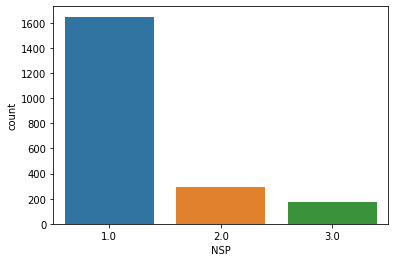

In [ ]:
# distribution of new data 
sns.countplot(x ='NSP', data = ctg_data)
plt.show()

### **UNDERSAMPLING TECHNIQUE AND DATA SPLITTING**

In [ ]:
# split data into training and testing sets
x_t, x_test, y_t, y_test = train_test_split(scaled_x, y, test_size=0.25, random_state=0)

# undersampling technique on train dataset only
nms = NearMiss(version = 1, n_neighbors = 3)
x_train, y_train = nms.fit_resample(x_t, y_t)

In [ ]:
scaled_x.shape

(2114, 5)

In [ ]:
# shape before undersampling applied 
x_t.shape, y_t.shape

((1585, 5), (1585,))

In [ ]:
y_t.value_counts()

1.0    1223
2.0     233
3.0     129
Name: NSP, dtype: int64

In [ ]:
# shape after technique
x_train.shape, y_train.shape

((387, 5), (387,))

In [ ]:
x_test.shape, y_test.shape

((529, 5), (529,))

In [ ]:
y_train.value_counts()

1.0    129
2.0    129
3.0    129
Name: NSP, dtype: int64

In [ ]:
y_test.value_counts()


1.0    425
2.0     59
3.0     45
Name: NSP, dtype: int64

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

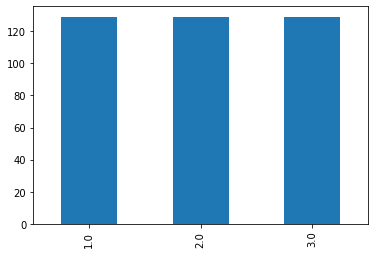

In [ ]:
pd.Series(y_train).value_counts().plot.bar()
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

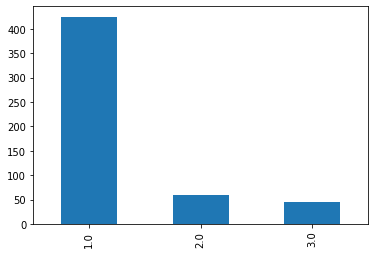

In [ ]:
pd.Series(y_test).value_counts().plot.bar()
plt.grid

## **MODEL FITTING**

### **1a) Logistic Regression**

In [ ]:
# Create and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

0.947069943289225
              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98       425
         2.0       0.85      0.69      0.77        59
         3.0       1.00      0.78      0.88        45

    accuracy                           0.95       529
   macro avg       0.94      0.82      0.87       529
weighted avg       0.95      0.95      0.94       529



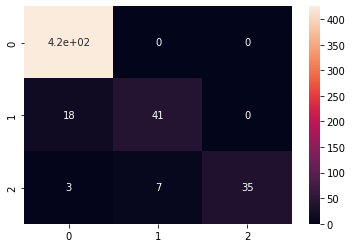

In [ ]:
# Evaluation
prediction_1a = log_reg.predict(x_test)
# View accuracy score
print(accuracy_score(y_test, prediction_1a))
conf_1a = confusion_matrix(y_test, prediction_1a)
print(classification_report(y_test, prediction_1a))

sns.heatmap(conf_1a, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_1a, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    prediction_1a = lb.transform(prediction_1a)
    return roc_auc_score(y_test, prediction_1a, average=average)
multiclass_roc_auc_score(y_test, prediction_1a)

0.8759793896784521

### **1b) Logistic Regression (Hyperparameter Tuning)**

In [ ]:
# We'll try both 'l1' and 'l2' regularization.
# C is the inverse of regularization strength. Smaller C will result in stronger regularization.
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.1, 1, 10, 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

# Setting max_iter to 1000 ensures that the solver will converge for this particular data set.
log_para = LogisticRegression(max_iter=1000)

In [ ]:
# Create a GridSearchCV model
# This will train the model 'lr' with each possible combination of hyperparameters in 'parameters'
clf = GridSearchCV(log_para,                    
                   param_grid = parameters,
                   cv = 10)                    

In [ ]:
# Fit the GridSearchCV model
clf.fit(x_train, y_train)

In [ ]:
# Print the hyperparameters that performed the best.
print(clf.best_estimator_)

LogisticRegression(C=10, max_iter=1000, solver='newton-cg')


0.9640831758034026
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       425
         2.0       0.98      0.69      0.81        59
         3.0       1.00      0.98      0.99        45

    accuracy                           0.96       529
   macro avg       0.98      0.89      0.93       529
weighted avg       0.96      0.96      0.96       529



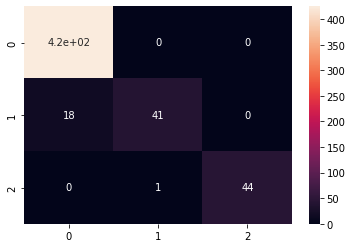

In [ ]:
prediction_1b = clf.predict(x_test)
print(accuracy_score(y_test, prediction_1b))
conf_1b = confusion_matrix(y_test, prediction_1b)
print(classification_report(y_test, prediction_1b))

sns.heatmap(conf_1b, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_1b, average="macro"):
    lb1 = preprocessing.LabelBinarizer()
    lb1.fit(y_test)
    y_test = lb1.transform(y_test)
    prediction_1b = lb1.transform(prediction_1b)
    return roc_auc_score(y_test, prediction_1b, average=average)
multiclass_roc_auc_score(y_test, prediction_1b)

0.9162480748939458

### **2a) K-Nearest Neighbour**

In [ ]:
#Create KNN Object.
knn = KNeighborsClassifier()

#Training the model.
knn.fit(x_train, y_train)

KNeighborsClassifier()

0.9111531190926276
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       425
         2.0       0.89      0.71      0.79        59
         3.0       0.62      0.91      0.74        45

    accuracy                           0.91       529
   macro avg       0.82      0.85      0.83       529
weighted avg       0.92      0.91      0.91       529



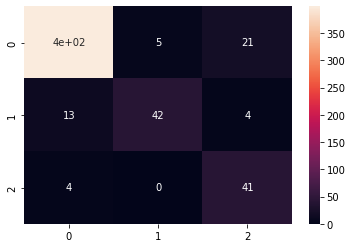

In [ ]:
# Evaluation
prediction_2a = knn.predict(x_test)
print(accuracy_score(y_test, prediction_2a))
conf_2a = confusion_matrix(y_test, prediction_2a)
print(classification_report(y_test, prediction_2a))

sns.heatmap(conf_2a, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_2a, average="macro"):
    lb2a = preprocessing.LabelBinarizer()
    lb2a.fit(y_test)
    y_test = lb2a.transform(y_test)
    prediction_2a = lb2a.transform(prediction_2a)
    return roc_auc_score(y_test, prediction_2a, average=average)
multiclass_roc_auc_score(y_test, prediction_2a)

0.8893410530677791

### **2b) K-Nearest Neighbour (Hyperparameter Tuning)**

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,100))
n_neighbors = list(range(1,50))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
knn_hyper = GridSearchCV(knn_2, hyperparameters, cv=10)

In [ ]:
#Fit the model
best_model = knn_hyper.fit(x_train, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


0.8903591682419659
              precision    recall  f1-score   support

         1.0       0.97      0.89      0.93       425
         2.0       0.61      0.86      0.71        59
         3.0       0.75      0.91      0.82        45

    accuracy                           0.89       529
   macro avg       0.77      0.89      0.82       529
weighted avg       0.91      0.89      0.90       529



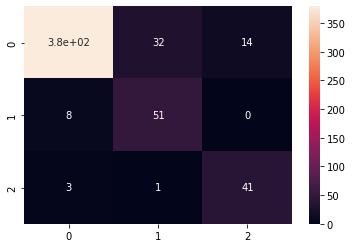

In [ ]:
# Evaluation
prediction_2b = knn_hyper.predict(x_test)
print(accuracy_score(y_test, prediction_2b))
conf_2b = confusion_matrix(y_test, prediction_2b)
print(classification_report(y_test, prediction_2b))

sns.heatmap(conf_2b, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_2b, average="macro"):
    lb2b = preprocessing.LabelBinarizer()
    lb2b.fit(y_test)
    y_test = lb2b.transform(y_test)
    prediction_2b = lb2b.transform(prediction_2b)
    return roc_auc_score(y_test, prediction_2b, average=average)
multiclass_roc_auc_score(y_test, prediction_2b)

0.9103958300155154

### **3a) Support Vector Machine (Linear SVC)**

In [ ]:
svc = SVC() 
svc

# Fit model
svc.fit(x_train, y_train)

SVC()

0.8449905482041588
              precision    recall  f1-score   support

         1.0       0.95      0.87      0.91       425
         2.0       0.93      0.69      0.80        59
         3.0       0.39      0.84      0.53        45

    accuracy                           0.84       529
   macro avg       0.76      0.80      0.74       529
weighted avg       0.90      0.84      0.86       529



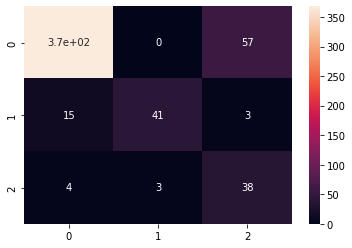

In [ ]:
# Evaluation
prediction_3a = svc.predict(x_test)
print(accuracy_score(y_test, prediction_3a))
conf_3a = confusion_matrix(y_test, prediction_3a)
print(classification_report(y_test, prediction_3a))

sns.heatmap(conf_3a, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_3a, average="macro"):
    lb3a = preprocessing.LabelBinarizer()
    lb3a.fit(y_test)
    y_test = lb3a.transform(y_test)
    prediction_3a = lb3a.transform(prediction_3a)
    return roc_auc_score(y_test, prediction_3a, average=average)
multiclass_roc_auc_score(y_test, prediction_3a)

0.8486999705097394

### **3b) SVC (Hyperparameter Tuning)**

In [ ]:
svc_3b = SVC()

# Dictionary of parameters for GridSearchCV
parameters = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [1, 10, 100]}

# Create a GridSearchCV model
grid = GridSearchCV(svc_3b, parameters, cv=10)

# Fit the GridSearchCV model to the training data
grid.fit(x_train, y_train)

# Print the model and hyperparameters obtained by GridSearchCV
grid.best_estimator_

SVC(C=10, kernel='linear')

0.9659735349716446
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       425
         2.0       1.00      0.69      0.82        59
         3.0       1.00      1.00      1.00        45

    accuracy                           0.97       529
   macro avg       0.99      0.90      0.93       529
weighted avg       0.97      0.97      0.96       529



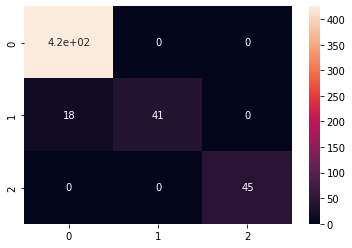

In [ ]:
# Evaluation
prediction_3b = grid.predict(x_test)
print(accuracy_score(y_test, prediction_3b))
conf_3b = confusion_matrix(y_test, prediction_3b)
print(classification_report(y_test, prediction_3b))

sns.heatmap(conf_3b, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_3b, average="macro"):
    lb3b = preprocessing.LabelBinarizer()
    lb3b.fit(y_test)
    y_test = lb3b.transform(y_test)
    prediction_3b = lb3b.transform(prediction_3b)
    return roc_auc_score(y_test, prediction_3b, average=average)
multiclass_roc_auc_score(y_test, prediction_3b)

0.9203063885267274

### **4a) XGBOOST CLASSIFIER**

In [ ]:
# Initial classifier
xgb_cl = XGBClassifier()

# Fit
xgb_cl.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

0.9603024574669187
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       425
         2.0       0.91      0.71      0.80        59
         3.0       1.00      1.00      1.00        45

    accuracy                           0.96       529
   macro avg       0.96      0.90      0.93       529
weighted avg       0.96      0.96      0.96       529



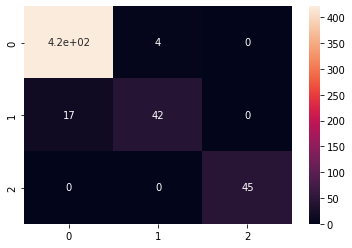

In [ ]:
# Evaluation
prediction_4a = xgb_cl.predict(x_test)
print(accuracy_score(y_test, prediction_4a))
conf_4a = confusion_matrix(y_test, prediction_4a)
print(classification_report(y_test, prediction_4a))

sns.heatmap(conf_4a, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_4a, average="macro"):
    lb4a = preprocessing.LabelBinarizer()
    lb4a.fit(y_test)
    y_test = lb4a.transform(y_test)
    prediction_4a = lb4a.transform(prediction_4a)
    return roc_auc_score(y_test, prediction_4a, average=average)
multiclass_roc_auc_score(y_test, prediction_4a)

0.9217467442190612

### **4b) XGBOOST (Hyperparameter Tuning)**

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
# Init classifier
xgb_cl4 = XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl4, param_grid, n_jobs=-1, cv=10, scoring="roc_auc")

# Fit
fit = grid_cv.fit(x_train, y_train)
grid.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

SVC(C=10, kernel='linear')

0.9489603024574669
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       425
         2.0       0.81      0.71      0.76        59
         3.0       1.00      1.00      1.00        45

    accuracy                           0.95       529
   macro avg       0.92      0.90      0.91       529
weighted avg       0.95      0.95      0.95       529



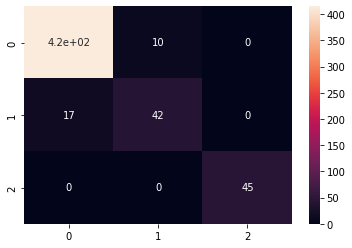

In [ ]:
# Evaluation
prediction_4b = fit.predict(x_test)
print(accuracy_score(y_test, prediction_4b))
conf_4b = confusion_matrix(y_test, prediction_4b)
print(classification_report(y_test, prediction_4b))

sns.heatmap(conf_4b, annot=True)

In [ ]:
#Print AUC for multiclass
def multiclass_roc_auc_score(y_test, prediction_4b, average="macro"):
    lb4b = preprocessing.LabelBinarizer()
    lb4b.fit(y_test)
    y_test = lb4b.transform(y_test)
    prediction_4b = lb4b.transform(prediction_4b)
    return roc_auc_score(y_test, prediction_4b, average=average)
multiclass_roc_auc_score(y_test, prediction_4b)

0.9172661434681227

## **METRIC SCORES VISUALIZATION**

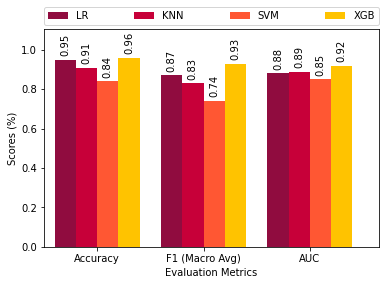

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = {'Metric_evaluation': ['Accuracy', 'F1', 'AUC'],
        'LR': [0.95, 0.87, 0.88],
        'KNN': [0.91, 0.83, 0.89],
        'SVM': [0.84, 0.74, 0.85],
        'XGB': [0.96, 0.93, 0.92]
    }

df = pd.DataFrame(raw_data, 
                  columns = ['Metric_evaluation', 'LR', 'KNN', 'SVM', 'XGB'])

ax = df.plot.bar(rot=0, color=["#900C3F", '#C70039', '#FF5733', '#FFC300'], 
                 width = 0.8 )

for p in ax.patches[0:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0.15)
ax.legend(ncol=len(df.columns), loc="lower left", bbox_to_anchor=(0,1.02,1,0.08), 
          borderaxespad=0, mode="expand")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Scores (%)")
ax.set_xticklabels(['Accuracy','F1 (Macro Avg)','AUC'])
plt.show()

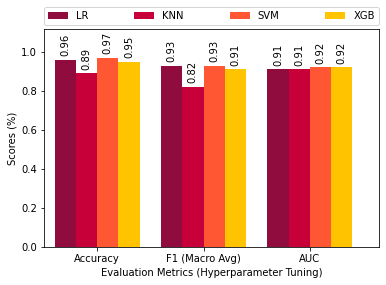

In [ ]:
# Hyperparameter tuning
raw_data2 = {'Metric_evaluation': ['Accuracy', 'F1', 'AUC'],
        'LR': [0.96, 0.93, 0.91],
        'KNN': [0.89, 0.82, 0.91],
        'SVM': [0.97, 0.93, 0.92],
        'XGB': [0.95, 0.91, 0.92]
    }

df2 = pd.DataFrame(raw_data2, 
                  columns = ['Metric_evaluation', 'LR', 'KNN', 'SVM', 'XGB'])

ax = df2.plot.bar(rot=0, color=["#900C3F", '#C70039', '#FF5733', '#FFC300'], 
                 width = 0.8 )

for p in ax.patches[0:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0.15)
ax.legend(ncol=len(df2.columns), loc="lower left", bbox_to_anchor=(0,1.02,1,0.08), 
          borderaxespad=0, mode="expand")
plt.xlabel("Evaluation Metrics (Hyperparameter Tuning)")
plt.ylabel("Scores (%)")
ax.set_xticklabels(['Accuracy','F1 (Macro Avg)','AUC'])
plt.show()